<a href="https://colab.research.google.com/github/moch1996/Vaycold/blob/main/Recommend_Algorithm/%237.%EB%94%A5%EB%9F%AC%EB%8B%9D%EA%B3%BC_%EC%B6%94%EC%B2%9C%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%2C_%EC%98%81%ED%99%94_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터셋 종류
 1. Movielens
 2. KMRD
 3. Netflix  

In [1]:
import os
import pandas as pd

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/MyDrive/fastcampus/recommend/'

## Movielens 데이터

In [5]:
path = data_path+'movielens'
tags_df = pd.read_csv(os.path.join(path, 'tags.csv'), encoding='utf-8')
ratings_df = pd.read_csv(os.path.join(path, 'ratings.csv'), index_col = 'userId', encoding='utf-8')
movies_df = pd.read_csv(os.path.join(path, 'movies.csv'), index_col = 'movieId', encoding='utf-8')

In [6]:
def get_simple_df_info(df):
  print("dataframe 사이즈: ", df.shape)
  print("\n")
  print("dataframe 정보")
  print(df.info())
  print("\n")
  print("dataframe 간단 통계량")
  print(df.describe())
  print("\n")
  print("dataframe의 몇몇 데이터 샘플")
  print(df.head())

In [7]:
get_simple_df_info(tags_df)

dataframe 사이즈:  (3683, 4)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB
None


dataframe 간단 통계량
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158.472553   43490.558803  1.721025e+08
min       2.000000       1.000000  1.137179e+09
25%     424.000000    1262.500000  1.137521e+09
50%     474.000000    4454.000000  1.269833e+09
75%     477.000000   39263.000000  1.498457e+09
max     610.000000  193565.000000  1.537099e+09


dataframe의 몇몇 데이터 샘플
   userId  movieId              tag   timestamp
0       2    60756            funny  144

## KMRD 
 - Korean Moive Recommender system Dtaset
 - 네이버 영화 평점 사이트를 바탕으로 제작 

In [8]:
%cd $data_path

/content/drive/MyDrive/fastcampus/recommend


In [9]:
!git clone https://github.com/lovit/kmrd

fatal: destination path 'kmrd' already exists and is not an empty directory.


In [10]:
%cd $data_path/kmrd

/content/drive/MyDrive/fastcampus/recommend/kmrd


In [11]:
!python setup.py install

running install
running bdist_egg
running egg_info
writing kmr_dataset.egg-info/PKG-INFO
writing dependency_links to kmr_dataset.egg-info/dependency_links.txt
writing requirements to kmr_dataset.egg-info/requires.txt
writing top-level names to kmr_dataset.egg-info/top_level.txt
writing manifest file 'kmr_dataset.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/kmr_dataset
copying build/lib/kmr_dataset/__init__.py -> build/bdist.linux-x86_64/egg/kmr_dataset
copying build/lib/kmr_dataset/install.py -> build/bdist.linux-x86_64/egg/kmr_dataset
copying build/lib/kmr_dataset/io.py -> build/bdist.linux-x86_64/egg/kmr_dataset
creating build/bdist.linux-x86_64/egg/kmr_dataset/datafile
creating build/bdist.linux-x86_64/egg/kmr_dataset/datafile/kmrd-small
copying build/lib/kmr_dataset/datafile/kmrd-small/castings.csv -> build/bdist.linux-x86_64/egg/kmr_data

In [ ]:
'''
!git clone https://github.com/lovit/kmrd
!python setup.py install
'''

In [ ]:
'''
path = data_path + "kmrd"
%cd $path

if not os.path.exists(path):
  !git clone https://github.com/lovit/kmrd
  !python setup.py install
else:
  print("data and path already exists!")
'''

In [ ]:
# dataset 종류
# 'small', '2m', '5m
# delimiter = '\t'

 - 2m 또는 5m은 zip파일로 되어 있음
 - kmr_dataset 있는 directory 임을 확인해야한다.

In [12]:
from kmr_dataset import load_rates
from kmr_dataset import get_paths

paths = get_paths(size='2m')
rates, timestamps = load_rates(size='2m')

skip 44048 lines which are duplicated (user, item), #uniques=2570549


In [ ]:
# 우리는 kmrd-small 데이터 사용 예정

In [13]:
data_path

'/content/drive/MyDrive/fastcampus/recommend/'

In [14]:
path = data_path + 'kmrd/kmr_dataset/datafile/kmrd-small'

In [15]:
print(os.listdir(path))

['castings.csv', 'countries.csv', 'genres.csv', 'movies.txt', 'peoples.txt', 'rates.csv']


In [16]:
castings_df = pd.read_csv(os.path.join(path, 'castings.csv'), encoding='utf-8')
get_simple_df_info(castings_df)

dataframe 사이즈:  (9776, 4)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9776 entries, 0 to 9775
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movie    9776 non-null   int64
 1   people   9776 non-null   int64
 2   order    9776 non-null   int64
 3   leading  9776 non-null   int64
dtypes: int64(4)
memory usage: 305.6 KB
None


dataframe 간단 통계량
              movie         people        order      leading
count   9776.000000    9776.000000  9776.000000  9776.000000
mean   10499.104746   36151.930851     9.799509     0.295315
std      287.023933   62989.430164    12.576221     0.456208
min    10001.000000       5.000000     1.000000     0.000000
25%    10260.000000    4327.000000     3.000000     0.000000
50%    10485.000000   14048.500000     6.000000     0.000000
75%    10754.250000   27978.000000    10.000000     1.000000
max    10999.000000  420466.000000   101.000000     1.000000


dataframe의 몇몇 데이터 샘플
 

In [ ]:
countries_df = pd.read_csv(os.path.join(path, 'countries.csv'), encoding='utf-8')
get_simple_df_info(countries_df)

In [ ]:
genres_df = pd.read_csv(os.path.join(path, 'genres.csv'), encoding='utf-8')
get_simple_df_info(genres_df)

In [59]:
movies_df = pd.read_csv(os.path.join(path, 'movies.txt'), sep='\t', encoding='utf-8')
get_simple_df_info(movies_df)

dataframe 사이즈:  (999, 5)


dataframe 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      999 non-null    int64  
 1   title      992 non-null    object 
 2   title_eng  991 non-null    object 
 3   year       609 non-null    float64
 4   grade      957 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.1+ KB
None


dataframe 간단 통계량
              movie         year
count    999.000000   609.000000
mean   10500.000000  1987.471264
std      288.530761    15.303710
min    10001.000000  1926.000000
25%    10250.500000  1982.000000
50%    10500.000000  1989.000000
75%    10749.500000  1991.000000
max    10999.000000  2020.000000


dataframe의 몇몇 데이터 샘플
   movie                 title  ...    year    grade
0  10001                시네마 천국  ...  2013.0   전체 관람가
1  10002              빽 투 더 퓨쳐  ...  2015.0  12세 관람가
2  10003  

In [ ]:
peoples_df = pd.read_csv(os.path.join(path, 'peoples.txt'), sep='\t', encoding='utf-8')
get_simple_df_info(peoples_df)

In [ ]:
rates_df = pd.read_csv(os.path.join(path, 'rates.csv'), encoding='utf-8')
get_simple_df_info(rates_df)

In [22]:
 # 장르 데이터 확인

In [23]:
genres_df.head()

,movie,genre
0,10001,드라마
1,10001,멜로/로맨스
2,10002,SF
3,10002,코미디
4,10003,SF


In [25]:
groups = genres_df.groupby('movie')

In [51]:
# 예쁘게 다듬자 무비같은 경우에 10001이 두개의 행으로 나누어져 있으니 하나로 합쳐서 나타내보자.
groups = genres_df.groupby('movie')
# list comprehension 용법
genres = [(list(set(x['movie'].values))[0]
           , '/'.join(x['genre'].values)) for  i,x in groups]
# 이 용법을 다시 한번 뜯어보자
# genres를 실현시켜보면 해석하기 쉬운거같다. 
genres[:5]

[(10001, '드라마/멜로/로맨스'),
 (10002, 'SF/코미디'),
 (10003, 'SF/코미디'),
 (10004, '서부/SF/판타지/코미디'),
 (10005, '판타지/모험/SF/액션')]

In [52]:
# 우선 list compreheinsion 을 사용하기 위해 [          ] 를 사용하였다.
# genres를 보면 인덱스, 장르 로 나눠져 있다. 즉 , 를 기준으로 x['movie'].values와 '/'.join(x['genre'].values) 두 개로 나누어 짐을 알 수 있다.

SyntaxError: ignored

In [53]:
combined_genres_df = pd.DataFrame(data=genres, columns=['movie', 'genres'])
combined_genres_df = combined_genres_df.set_index('movie')
combined_genres_df.head()

,genres
movie,
10001,드라마/멜로/로맨스
10002,SF/코미디
10003,SF/코미디
10004,서부/SF/판타지/코미디
10005,판타지/모험/SF/액션


In [60]:
movies_df.head()

,movie,title,title_eng,year,grade
0,10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가
1,10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가
2,10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가
3,10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가
4,10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG


In [61]:
movies_df.columns

Index(['movie', 'title', 'title_eng', 'year', 'grade'], dtype='object')

In [62]:
movies_df = movies_df.set_index('movie')
movies_df.head()

,title,title_eng,year,grade
movie,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG


In [63]:
# 아까 장르 데이터를 합치자

movies_df = pd.concat([movies_df, combined_genres_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres
movie,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션


In [64]:
# People 과 Casting 확인

In [65]:
peoples_df.head()

,people,korean,original
0,5,아담 볼드윈,Adam Baldwin
1,8,애드리안 라인,Adrian Lyne
2,9,에이단 퀸,Aidan Quinn
3,13,구로사와 아키라,Akira Kurosawa
4,15,알 파치노,Al Pacino


In [66]:
castings_df.head()

,movie,people,order,leading
0,10001,4374,1,1
1,10001,178,2,1
2,10001,3241,3,1
3,10001,47952,4,1
4,10001,47953,5,0


In [68]:
# 캐스팅 정보도 위의 영화 데이터 처럼 groupby를 활용하서 모아주자

casting = castings_df.groupby('movie')
castings = [(list(set(x['movie'].values))[0], x['people'].values) for i, x in casting]
combinde_castings_df = pd.DataFrame(data = castings, columns = ['movie','people'])
combinde_castings_df = combinde_castings_df.set_index('movie')
combinde_castings_df.head()

,people
movie,
10001,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,"[1007, 535, 215, 1236, 35]"


In [69]:
# 캐스팅 정보 또한 영화에다가 합쳐보자
movies_df = pd.concat([movies_df, combinde_castings_df], axis =1)
movies_df.head()

,title,title_eng,year,grade,genres,people
movie,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ..."
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]"
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,..."
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1..."
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]"


In [70]:
# countries 데이터 확인
countries_df.head()

,movie,country
0,10001,이탈리아
1,10001,프랑스
2,10002,미국
3,10003,미국
4,10004,미국


In [71]:
# 또 다시 그룹핑
groups = countries_df.groupby('movie')
countries = [(list(set(x['movie'].values))[0], ','.join(x['country'].values)) for index, x in groups][:10]
combined_countries_df = pd.DataFrame(data=countries, columns=['movie', 'country'])
combined_countries_df = combined_countries_df.set_index('movie')
combined_countries_df.head()

,country
movie,
10001,"이탈리아,프랑스"
10002,미국
10003,미국
10004,미국
10005,미국


In [72]:
# 얘도 영화 데이터에 넣어보자
movies_df = pd.concat([movies_df, combined_countries_df], axis=1)
movies_df.head()

,title,title_eng,year,grade,genres,people,country
movie,,,,,,,
10001,시네마 천국,"Cinema Paradiso , 1988",2013.0,전체 관람가,드라마/멜로/로맨스,"[4374, 178, 3241, 47952, 47953, 19538, 18991, ...","이탈리아,프랑스"
10002,빽 투 더 퓨쳐,"Back To The Future , 1985",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 8637, 5104, 9986, 7470, 9987]",미국
10003,빽 투 더 퓨쳐 2,"Back To The Future Part 2 , 1989",2015.0,12세 관람가,SF/코미디,"[1076, 4603, 917, 5104, 391, 5106, 5105, 5107,...",미국
10004,빽 투 더 퓨쳐 3,"Back To The Future Part III , 1990",1990.0,전체 관람가,서부/SF/판타지/코미디,"[1076, 4603, 1031, 5104, 10001, 5984, 10002, 1...",미국
10005,스타워즈 에피소드 4 - 새로운 희망,"Star Wars , 1977",1997.0,PG,판타지/모험/SF/액션,"[1007, 535, 215, 1236, 35]",미국


In [74]:
# 이번에는 유저와 아이템 간에 interaction이 어떠했는 지 확인해보자
print(rates_df.head())
print(rates_df.shape)

   user  movie  rate        time
0     0  10003     7  1494128040
1     0  10004     7  1467529800
2     0  10018     9  1513344120
3     0  10021     9  1424497980
4     0  10022     7  1427627340
(140710, 4)


In [76]:
# 총 몇명이 평가했을까??
n_unique_users= len(rates_df['user'].unique())
print(n_unique_users)

52028


In [78]:
# 총 영화의 갯수는???
n_unique_movies= len(rates_df['movie'].unique())
print(n_unique_movies)

600


In [81]:
# 평점의 평균은??
print('평점의 평균 : ', rates_df.rate.mean())
print('평점의 표준편차 : ', rates_df.rate.std())

평점의 평균 :  8.953258474877407
평점의 표준편차 :  2.106047173852251


In [83]:
# 결측값이 있는 지 확인해보자

rates_df.isnull().sum()

user     0
movie    0
rate     0
time     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f308d878450>,
      dtype=object)

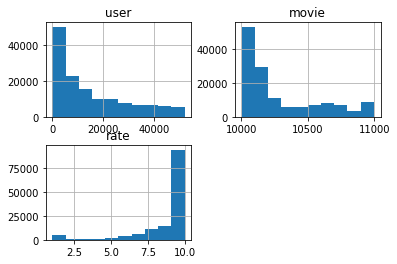

In [84]:
# 히스토그램볼까

rates_df[['user','movie','rate']].hist()

In [85]:
rates_df.groupby(['user','rate']).size()

user   rate
0      3        1
       4        2
       5        1
       6       14
       7       29
               ..
52023  10       1
52024  10       1
52025  7        1
52026  9        1
52027  10       1
Length: 67575, dtype: int64

In [87]:
rates_df.groupby('user').mean()

,movie,rate,time
user,,,
0,10330.588235,7.388235,1.447577e+09
1,10107.000000,9.000000,1.408888e+09
2,10198.866667,7.733333,1.321878e+09
3,10320.923913,7.413043,1.396393e+09
4,10364.323944,6.760563,1.464992e+09
...,...,...,...
52023,10998.000000,10.000000,1.421680e+09
52024,10998.000000,10.000000,1.204622e+09
52025,10998.000000,7.000000,1.498547e+09


In [90]:
rates_df.groupby('user')['movie'].count()

user
0        85
1         1
2        15
3        92
4        71
         ..
52023     1
52024     1
52025     1
52026     1
52027     1
Name: movie, Length: 52028, dtype: int64

In [ ]:
# 유저가 평점을 준 영화의 수 &